# Apple Vision Pro Sentiment Analysis [  Clustering & PCA]

In [3]:
import praw
import pandas as pd
import numpy as np
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize

In [4]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# POS Tagged Data Loading

In [7]:
reddit_data = pd.read_csv('POS_Tagged_Data.csv')

In [8]:
reddit_data.head()

,Unnamed: 0,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags
0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),..."
1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""..."
2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ..."
3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ..."
4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),..."


# Clustering

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [56]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(words) for words in reddit_data['Without_stopwords']])

In [57]:
#print(tfidf_matrix)

In [58]:
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [59]:
df = pd.DataFrame()

In [60]:
reddit_data['Cluster'] = kmeans.labels_

In [61]:
reddit_data.head(5)

,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster
0,"[apple, vision, pro, has, ruined, movies, for,...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"[apple, vision, pro, ruined, movies]","['apple', 'vision', 'pro', 'ruined', 'movies']","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",2
1,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"[expensive, regrets]","['expensive', 'regrets']","[([, RB), ('expensive, JJ), (', ''), (,, ,), (...",0
2,"[how, to, ruin, your, movie, library]",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"[ruin, movie, library]","['ruin', 'movie', 'library']","[([, JJ), ('ruin, NNP), (', POS), (,, ,), ('mo...",0
3,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"[really, wrong, avp, incredible, piece, tech, ...","['really', 'wrong', 'avp', 'incredible', 'piec...","[([, RB), ('really, RB), (', ''), (,, ,), ('wr...",0
4,"[apple, vision, pro, is, the, best, thing, to,...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"[apple, vision, pro, best, thing, happen, movi...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",2


In [62]:
print(reddit_data[['Title', 'Cluster']])

                                                Title  Cluster
0   [apple, vision, pro, has, ruined, movies, for,...        2
1                  [its, too, expensive, no, regrets]        0
2               [how, to, ruin, your, movie, library]        0
3   [i, was, really, wrong, about, the, avp, this,...        0
4   [apple, vision, pro, is, the, best, thing, to,...        2
5   [just, posting, to, say, i, have, had, the, vi...        1
6   [breaking, news, local, man, paralyzed, by, in...        2
7    [absolutely, magical, no, other, words, for, it]        0
8                [forgetting, about, your, own, body]        0
9                                         [imax, app]        0
10                       [apple, vision, pro, stolen]        2
11                [folks, know, whats, coming, right]        0
12              [best, new, product, ive, ever, seen]        0
13        [who, is, obsessed, with, the, vision, pro]        2
14             [really, want, to, keep, it, but, why]  

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

In [65]:
reddit_data['PCA1'] = tfidf_2d[:, 0]
reddit_data['PCA2'] = tfidf_2d[:, 1]

In [67]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2
0,"[apple, vision, pro, has, ruined, movies, for,...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"[apple, vision, pro, ruined, movies]","['apple', 'vision', 'pro', 'ruined', 'movies']","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",2,0.546980,-0.066286
1,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"[expensive, regrets]","['expensive', 'regrets']","[([, RB), ('expensive, JJ), (', ''), (,, ,), (...",0,-0.114996,-0.031873
2,"[how, to, ruin, your, movie, library]",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"[ruin, movie, library]","['ruin', 'movie', 'library']","[([, JJ), ('ruin, NNP), (', POS), (,, ,), ('mo...",0,-0.114996,-0.031873
3,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"[really, wrong, avp, incredible, piece, tech, ...","['really', 'wrong', 'avp', 'incredible', 'piec...","[([, RB), ('really, RB), (', ''), (,, ,), ('wr...",0,-0.178261,-0.125401
4,"[apple, vision, pro, is, the, best, thing, to,...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"[apple, vision, pro, best, thing, happen, movi...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",2,0.393936,-0.019660


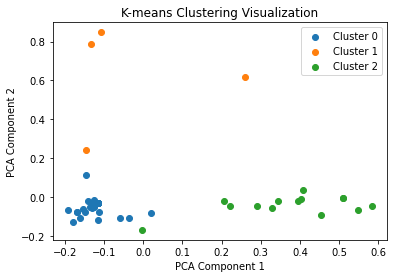

In [69]:
plt.figure(figsize=(6, 4))
for cluster in range(num_clusters):
    cluster_points = reddit_data[reddit_data['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [65]:
cluster_labels = reddit_data['Cluster']

In [66]:
from sklearn.metrics import calinski_harabasz_score

In [67]:
calinski_harabasz = calinski_harabasz_score(tfidf_matrix.toarray(), cluster_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Calinski-Harabasz Score: 2.3903216394475764


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

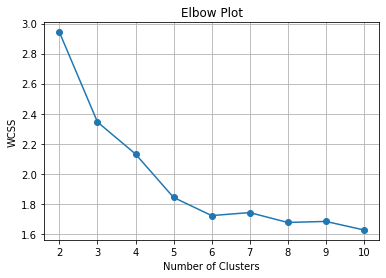

In [154]:
num_clusters_range = range(2, 11)  # Adjust as needed

# Calculate Calinski-Harabasz score for different numbers of clusters
calinski_scores = []
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    calinski_scores.append(calinski_harabasz_score(tfidf_matrix.toarray(), cluster_labels))

# Plotting the results
plt.plot(num_clusters_range, calinski_scores, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

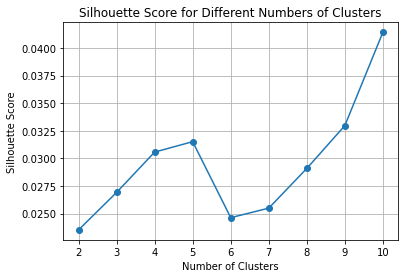

In [70]:
num_clusters_range = range(2, 11)  # Adjust as needed

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))

# Plotting the results
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [71]:
num_clusters = 7  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

In [72]:
reddit_data['For_Cluster_Seven'] = kmeans.labels_

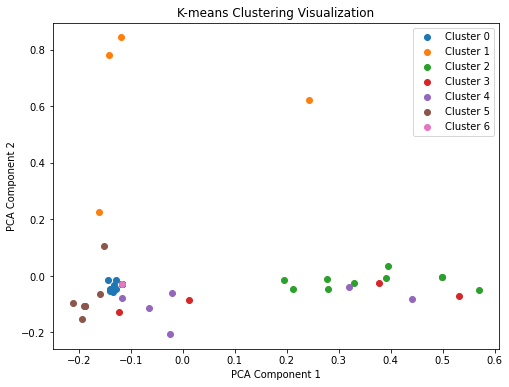

In [73]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_points = reddit_data[reddit_data['For_Cluster_Seven'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [74]:
num_clusters = 10  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [75]:
reddit_data['For_Cluster_Ten'] = kmeans.labels_

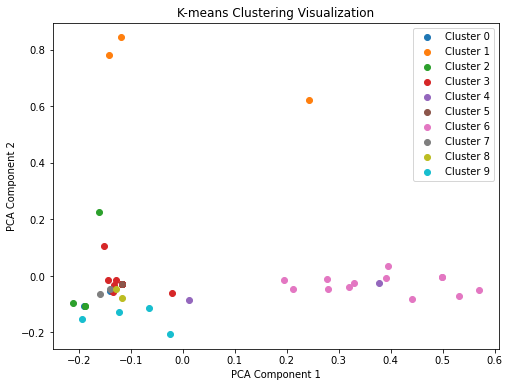

In [76]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_points = reddit_data[reddit_data['For_Cluster_Ten'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Although Elbow Plot and Silhouette Method show that the value of K should be 2,7 or 9. We can observe that the number of clusters for k=7 is also not giving us a very good idea about the categories into which the data can be divided. Hence, we can say that k-means clusteering is not effective for this dataset.

# Hierarchical Clustering

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

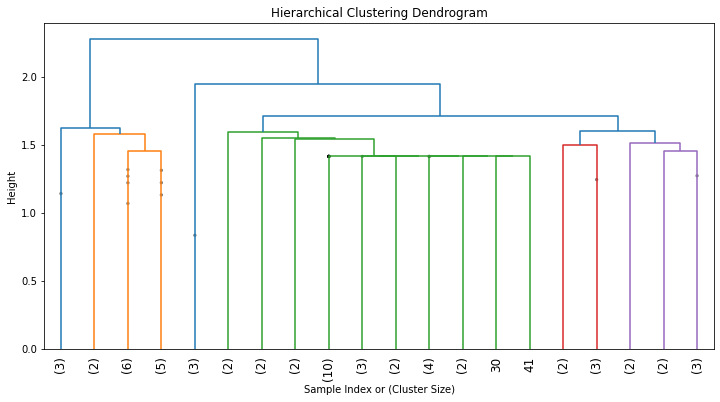

In [78]:
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Height')
plt.show()

In [80]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2,For_Cluster_Seven,For_Cluster_Ten
0,"[apple, vision, pro, has, ruined, movies, for,...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"[apple, vision, pro, ruined, movies]","['apple', 'vision', 'pro', 'ruined', 'movies']","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",1,0.530746,-0.071059,3,6
1,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"[expensive, regrets]","['expensive', 'regrets']","[([, RB), ('expensive, JJ), (', ''), (,, ,), (...",0,-0.116912,-0.028770,0,3
2,"[how, to, ruin, your, movie, library]",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"[ruin, movie, library]","['ruin', 'movie', 'library']","[([, JJ), ('ruin, NNP), (', POS), (,, ,), ('mo...",0,-0.116912,-0.028770,0,3
3,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"[really, wrong, avp, incredible, piece, tech, ...","['really', 'wrong', 'avp', 'incredible', 'piec...","[([, RB), ('really, RB), (', ''), (,, ,), ('wr...",0,-0.193066,-0.151466,5,9
4,"[apple, vision, pro, is, the, best, thing, to,...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"[apple, vision, pro, best, thing, happen, movi...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[([, JJ), ('apple, NNP), (', POS), (,, ,), ('v...",1,0.378038,-0.023511,3,4


In [70]:
reddit_data.to_csv('Clustering Data.csv')